<a href="https://colab.research.google.com/github/gonzalo-marrero/stellar_opacity_calc/blob/main/Opacidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##CALCULO DE POBLACIONES---------------------------------------------------------------------------------
##Importamos los datos de los dos modelos y guardamos los parametros en un array
#Los datos proporcionados por el modelo se encientrane n el sistema CGS
"""import numpy as np
modelo1=np.loadtxt('t5000.dat')
modelo2=np.loadtxt('t8000.dat')""" #Se activa estas lineas si corremos en COLAB.
import os
import numpy as np

# Carpeta donde están los archivos .dat
DATA_DIR = "data"

# Cargar los modelos desde la carpeta data
modelo1 = np.loadtxt(os.path.join(DATA_DIR, "t5000.dat"))
modelo2 = np.loadtxt(os.path.join(DATA_DIR, "t8000.dat"))

lgTauR1=modelo1[:,1] #log(profundidad optica de Rosseland)
lgTauR2=modelo2[:,1]
TauR1=10**(lgTauR1)  # Profundidad optica de Rosseland
TauR2=10**(lgTauR2)
lgTauR2=modelo2[:,1]
T1=modelo1[:,3]  #Temperatura(K)
T2=modelo2[:,3]
Pe1=modelo1[:,4] #Presion electronica(dyn/cm^2)
Pe2=modelo2[:,4]
#Argumento de TauR cuando TauR=1 y TauR=10
for i in range(len(TauR1)):
  if TauR1[i]==1:
   print('Arg(TauR=1)='+str(i))
  if TauR1[i]==10:
   print('Arg(TauR=10)='+str(i))
#Constantes necesarias para aplicar la ecuación de Saha
kB=1.38e-16 #erg/k

#Energias de ionización
XH_neg=0.755/6.2415e11  #erg  H- -->HI
XHI=13.6/6.2415e11 #erg  HI-->HII

#Densidad electronica
Ne_5000=Pe1/(kB*T1) #Modelo 5000
Ne_8000=Pe2/(kB*T2) #Modelo 8000

#Funciones de partición
UH_neg=1.0
UHI=2.0
UHII=1.0

#Ecuación de Saha-----------------------------------------------------------------------------------------
#H-/HI,HI/HII:
#Calculo de poblaciones para los estados de ionización H-,HI,HII

   #NH_neg/NHI=f1  #Se calculan f1 y f2 para cada modelo para posteriormente
   #NHI/NHII=f2    #resolver el sistema de ecuaciones en forma matricial
   #Ne+NH_neg=NHII #Conservación de la carga

#Modelo5000
f1_5000=2.07e-16*Ne_5000*(UH_neg/UHI)*T1**(-3/2)*np.exp(XH_neg/(kB*T1))
f2_5000=2.07e-16*Ne_5000*(UHI/UHII)*T1**(-3/2)*np.exp(XHI/(kB*T1))
#Resuelvo el sistema
NH_neg_5000=np.zeros(len(f1_5000))
NHI_5000=np.zeros(len(f1_5000))
NHII_5000=np.zeros(len(f1_5000))
for i in range(len(f1_5000)):
  matrix_f5000=np.array ([[1,-f1_5000[i],0] , [0,1,-f2_5000[i]],[1,0,-1]])
  sol_5000=np.array([0,0,-Ne_5000[i]])
  Poblaciones1=np.linalg.solve(matrix_f5000,sol_5000)
  NH_neg_5000[i]=Poblaciones1[0]
  NHI_5000[i]=Poblaciones1[1]
  NHII_5000[i]=Poblaciones1[2]
print('Poblaciones de cada estado de ionizacion')
print('')
print('Modelo T=5000 K')
print('TauR=1')
print('NH_neg='+str(format(NH_neg_5000[40],'.7E')))
print('NHI='+str(format(NHI_5000[40],'.7E')))
print('NHII='+str(format(NHII_5000[40],'.7E')))
print('Ne='+str(format(Ne_5000[40],'.7E')))
print('TauR=10')
print('NH_neg='+str(format(NH_neg_5000[50],'.7E')))
print('NHI='+str(format(NHI_5000[50],'.7E')))
print('NHII='+str(format(NHII_5000[50],'.7E')))
print('Ne='+str(format(Ne_5000[50],'.7E')))

#Modelo8000
f1_8000=2.07e-16*Ne_8000*(UH_neg/UHI)*T2**(-3/2)*np.exp(XH_neg/(kB*T2))
f2_8000=2.07e-16*Ne_8000*(UHI/UHII)*T2**(-3/2)*np.exp(XHI/(kB*T2))

#Resuelvo el sistema
NH_neg_8000=np.zeros(len(f1_8000))
NHI_8000=np.zeros(len(f1_8000))
NHII_8000=np.zeros(len(f1_8000))
for i in range(len(f1_8000)):
  matrix_f8000=np.array ([[1,-f1_8000[i],0] , [0,1,-f2_8000[i]],[1,0,-1]])
  sol_8000=np.array([0,0,-Ne_8000[i]])
  Poblaciones2=np.linalg.solve(matrix_f8000,sol_8000)
  NH_neg_8000[i]=Poblaciones2[0]
  NHI_8000[i]=Poblaciones2[1]
  NHII_8000[i]=Poblaciones2[2]
print('')
print('Modelo T=8000 K')
print('TauR=1')
print('NH_neg='+str(format(NH_neg_8000[40],'.7E')))
print('NHI='+str(format(NHI_8000[40],'.7E')))
print('NHII='+str(format(NHII_8000[40],'.7E')))
print('Ne='+str(format(Ne_8000[40],'.7E')))
print('TauR=10')
print('NH_neg='+str(format(NH_neg_8000[50],'.7E')))
print('NHI='+str(format(NHI_8000[50],'.7E')))
print('NHII='+str(format(NHII_8000[50],'.7E')))
print('Ne='+str(format(Ne_8000[50],'.7E')))

Arg(TauR=1)=40
Arg(TauR=10)=50
Poblaciones de cada estado de ionizacion

Modelo T=5000 K
TauR=1
NH_neg=8.0157617E+09
NHI=5.4232800E+17
NHII=1.1452068E+13
Ne=1.1444052E+13
TauR=10
NH_neg=3.5651720E+10
NHI=1.2663010E+17
NHII=6.1750307E+14
Ne=6.1746742E+14

Modelo T=8000 K
TauR=1
NH_neg=8.3719006E+08
NHI=6.1144699E+15
NHII=3.9038801E+14
Ne=3.9038717E+14
TauR=10
NH_neg=1.4786968E+08
NHI=4.1011062E+14
NHII=2.5591356E+15
Ne=2.5591354E+15


In [ ]:
#Ecuación de Boltzmann---------------------------------------------------------------------------------------
#Poblaciones para los niveles de excitación desde n=1 a n=4 del estado de
# ionización HI. La población de H- consideramos que solo se encuentra
# distribuida en el nivel fundamental.

#Peso estadistico o degeneracion
n=4
gi=np.zeros(n)
for i in range(1,n+1,1):
 gi[i-1]=2*i**2

#Energias por niveles de HI y diferencias de energia entre nivel i=2,3,4 y nivel 1
XHI=np.zeros(n)
Xdif=np.zeros(n-1)
for i in range(1,n+1,1):
 XHI[i-1]=-13.6/(6.2415e11*i**2) #erg
for i in range(n-1):
  Xdif[i]=XHI[i+1]-XHI[0]        #erg

# Poblaciones de HI para los niveles de excitación n=1,2,3,4 en cada punto
# de la atmósfera para cada modelo
#Modelo T=5000 K
f=np.zeros(n-1) #Poblaciones relativas NHI,i+1/NHI,i
NHI_1_5000=np.zeros(len(T1))
NHI_2_5000=np.zeros(len(T1))
NHI_3_5000=np.zeros(len(T1))
NHI_4_5000=np.zeros(len(T1))
for j in range(len(T1)):  #Para cada T calculamos las poblaciones
   for i in range(n-1):
     f[i]=(gi[i+1]/gi[i])*np.exp(-Xdif[i]/(kB*T1[j]))

   NHI_1_5000[j]=NHI_5000[j]/(1+f[0]+f[1]+f[2]) #NHI_1
   NHI_2_5000[j]=f[0]*NHI_1_5000[j]             #NHI_2
   NHI_3_5000[j]=f[1]*NHI_1_5000[j]             #NHI_3
   NHI_4_5000[j]=f[2]*NHI_1_5000[j]             #NHI_4

#Modelo T=8000 K
f=np.zeros(n-1) #Poblaciones relativas NHI,i+1/NHI,i
NHI_1_8000=np.zeros(len(T1))
NHI_2_8000=np.zeros(len(T1))
NHI_3_8000=np.zeros(len(T1))
NHI_4_8000=np.zeros(len(T1))
for j in range(len(T1)):  #Para cada T calculamos las poblaciones
   for i in range(n-1):
     f[i]=(gi[i+1]/gi[i])*np.exp(-Xdif[i]/(kB*T2[j]))

   NHI_1_8000[j]=NHI_8000[j]/(1+f[0]+f[1]+f[2]) #NHI_1
   NHI_2_8000[j]=f[0]*NHI_1_8000[j]             #NHI_2
   NHI_3_8000[j]=f[1]*NHI_1_8000[j]             #NHI_3
   NHI_4_8000[j]=f[2]*NHI_1_8000[j]             #NHI_4

print('Poblaciones para los estados de excitacion n=1,2,3,4 de HI')
print('')
print('Modelo T=5000')
print('TauR=1')
print('NHI_1='+str(format(NHI_1_5000[40],'.7E')))
print('NHI_2='+str(format(NHI_2_5000[40],'.7E')))
print('NHI_3='+str(format(NHI_3_5000[40],'.7E')))
print('NHI_4='+str(format(NHI_4_5000[40],'.7E')))
print('TauR=10')
print('NHI_1='+str(format(NHI_1_5000[50],'.7E')))
print('NHI_2='+str(format(NHI_2_5000[50],'.7E')))
print('NHI_3='+str(format(NHI_3_5000[50],'.7E')))
print('NHI_4='+str(format(NHI_4_5000[50],'.7E')))
print('')
print('Modelo T=8000')
print('TauR=1')
print('NHI_1='+str(format(NHI_1_8000[40],'.7E')))
print('NHI_2='+str(format(NHI_2_8000[40],'.7E')))
print('NHI_3='+str(format(NHI_3_8000[40],'.7E')))
print('NHI_4='+str(format(NHI_4_8000[40],'.7E')))
print('TauR=10')
print('NHI_1='+str(format(NHI_1_8000[50],'.7E')))
print('NHI_2='+str(format(NHI_2_8000[50],'.7E')))
print('NHI_3='+str(format(NHI_3_8000[50],'.7E')))
print('NHI_4='+str(format(NHI_4_8000[50],'.7E')))

Poblaciones para los estados de excitacion n=1,2,3,4 de HI

Modelo T=5000
TauR=1
NHI_1=5.4232800E+17
NHI_2=7.6532158E+08
NHI_3=7.6472905E+06
NHI_4=1.4741508E+06
TauR=10
NHI_1=1.2662996E+17
NHI_2=1.3971231E+11
NHI_3=4.7935866E+09
NHI_4=1.4230223E+09

Modelo T=8000
TauR=1
NHI_1=6.1144388E+15
NHI_2=2.9340251E+10
NHI_3=1.3216413E+09
NHI_4=4.3156191E+08
TauR=10
NHI_1=4.0992559E+14
NHI_2=1.6143721E+11
NHI_3=1.6448765E+10
NHI_4=7.1471149E+09


In [ ]:


#CALCULO DE OPACIDADES--------------------------------------------------------------------------------

#Opacidad libre-libre del ion HII en cada punto de la atmosfera------------------------------------------

#Modelo T=5000 K
h=6.6261e-27  #erg.s
c=3e10        #cm/s
Z=1           #numero atomico
R=1.0968e5    #cm**-1
lamda=np.linspace(500e-8,20000e-8,1000) # longitud de onda en cm


g_ff_5000=np.zeros((len(T1),len(lamda)))            #Factor de Gaunt
sig_ff_5000=np.zeros((len(T1),len(lamda)))          #Sección eficaz
k_ff_5000=np.zeros((len(T1),len(lamda)))            #Opacidad libre-libre
                                            #Los parametros anteriores se calculan en cada
for i in range(len(T1)):                     #punto de la atmosfera (filas) para cada lamda
  for j in range(len(lamda)):                #comprendidas en el intervalo [500,20000] A (columnas)
    g_ff_5000[i][j]=1+((0.3456)/(lamda[j]*R)**(1/3))*((lamda[j]*kB*T1[i])/(h*c)+1/2)
    sig_ff_5000[i][j]=3.7e8*((Z**2*lamda[j]**3)/(T1[i]**(1/2)*c**3))*g_ff_5000[i][j] #cm^-5
    k_ff_5000[i][j]=sig_ff_5000[i][j]*Ne_5000[i]*NHII_5000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T1[i]))) #cm^-1

#Modelo T=8000 K

g_ff_8000=np.zeros((len(T2),len(lamda)))            #Factor de Gaunt
sig_ff_8000=np.zeros((len(T2),len(lamda)))          #Sección eficaz
k_ff_8000=np.zeros((len(T2),len(lamda)))            #Opacidad libre-libre

for i in range(len(T2)):
  for j in range(len(lamda)):
    g_ff_8000[i][j]=1+((0.3456)/(lamda[j]*R)**(1/3))*((lamda[j]*kB*T2[i])/(h*c)+1/2)
    sig_ff_8000[i][j]=3.7e8*((Z**2*lamda[j]**3)/(T2[i]**(1/2)*c**3))*g_ff_8000[i][j] #cm^-5
    k_ff_8000[i][j]=sig_ff_8000[i][j]*Ne_8000[i]*NHII_8000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T2[i]))) #cm^-1

#Opacidad libre-libre de H- en cada punto de la atmosfera------------------------------------------------

#Modelo T=5000 k
theta1=5040/T1
f0=-2.2763-1.6850*np.log10(lamda*1e8)+0.76661*(np.log10(lamda*1e8))**2 -0.053346*(np.log10(lamda*1e8))**3
f1=15.2827-9.2846*np.log10(lamda*1e8) +1.99381*(np.log10(lamda*1e8))**2 -0.142631*(np.log10(lamda*1e8))**3
f2=-197.789+ 190.266*np.log10(lamda*1e8)-67.9775*(np.log10(lamda*1e8))**2 +10.6913*(np.log10(lamda*1e8))**3-0.625151*(np.log10(lamda*1e8))**4

sig_ff_H_neg_5000=np.zeros((len(T1),len(lamda)))  #sección eficaz
k_ff_H_neg_5000=np.zeros((len(T1),len(lamda)))    #opacidad free-free del ion H-
for i in range(len(T1)):                          #Guardamos los resultados en matrices
  for j in range(len(lamda)):
    sig_ff_H_neg_5000[i][j]=10**-26*10**(f0[j]+f1[j]*np.log10(theta1[i])*f2[j]*np.log10(theta1[i])**2)
    k_ff_H_neg_5000[i][j]=Pe1[i]*sig_ff_H_neg_5000[i][j]*NHI_5000[i] #cm^2

#Modelo T=8000 K
theta2=5040/T2

sig_ff_H_neg_8000=np.zeros((len(T2),len(lamda)))
k_ff_H_neg_8000=np.zeros((len(T2),len(lamda)))
for i in range(len(T2)):
  for j in range(len(lamda)):
    sig_ff_H_neg_8000[i][j]=10**-26*10**(f0[j]+f1[j]*np.log10(theta2[i])*f2[j]*np.log10(theta2[i])**2)
    k_ff_H_neg_8000[i][j]=Pe2[i]*sig_ff_H_neg_8000[i][j]*NHI_8000[i] #cm^2
##PRINTS
print('Opacidad f-f de HI a TauR=1 en los cantos')
print('Modelo T=5000 K')
print('             -Delta lamda   '+'    +Delta lamda')
print('lambda 1      '+str(format(k_ff_5000[40][21],'.7E'))+'    '+str(format(k_ff_5000[40][22],'.7E')))
print('lambda 2      '+str(format(k_ff_5000[40][161],'.7E'))+'    '+str(format(k_ff_5000[40][162],'.7E')))
print('lambda 3      '+str(format(k_ff_5000[40][394],'.7E'))+'    '+str(format(k_ff_5000[40][395],'.7E')))
print('lambda 4      '+str(format(k_ff_5000[40][721],'.7E'))+'    '+str(format(k_ff_5000[40][722],'.7E')))
print('')
print('Opacidad f-f de H- a TauR=1 en los cantos')
print('Modelo T=5000 K')
print('             -Delta lamda   '+'    +Delta lamda')
print('lambda 1      '+str(format(k_ff_H_neg_5000[40][21],'.7E'))+'    '+str(format(k_ff_H_neg_5000[40][22],'.7E')))
print('lambda 2      '+str(format(k_ff_H_neg_5000[40][161],'.7E'))+'    '+str(format(k_ff_H_neg_5000[40][162],'.7E')))
print('lambda 3      '+str(format(k_ff_H_neg_5000[40][394],'.7E'))+'    '+str(format(k_ff_H_neg_5000[40][395],'.7E')))
print('lambda 4      '+str(format(k_ff_H_neg_5000[40][721],'.7E'))+'    '+str(format(k_ff_H_neg_5000[40][722],'.7E')))
########################################################################################################################
print('Opacidad f-f de HI a TauR=1 en los cantos')
print('Modelo T=8000 K')
print('             -Delta lamda   '+'    +Delta lamda')
print('lambda 1      '+str(format(k_ff_8000[40][21],'.7E'))+'    '+str(format(k_ff_8000[40][22],'.7E')))
print('lambda 2      '+str(format(k_ff_8000[40][161],'.7E'))+'    '+str(format(k_ff_8000[40][162],'.7E')))
print('lambda 3      '+str(format(k_ff_8000[40][394],'.7E'))+'    '+str(format(k_ff_8000[40][395],'.7E')))
print('lambda 4      '+str(format(k_ff_8000[40][721],'.7E'))+'    '+str(format(k_ff_8000[40][722],'.7E')))
print('')
print('Opacidad f-f de H- a TauR=1 en los cantos')
print('Modelo T=8000 K')
print('             -Delta lamda   '+'    +Delta lamda')
print('lambda 1      '+str(format(k_ff_H_neg_8000[40][21],'.7E'))+'    '+str(format(k_ff_H_neg_8000[40][22],'.7E')))
print('lambda 2      '+str(format(k_ff_H_neg_8000[40][161],'.7E'))+'    '+str(format(k_ff_H_neg_8000[40][162],'.7E')))
print('lambda 3      '+str(format(k_ff_H_neg_8000[40][394],'.7E'))+'    '+str(format(k_ff_H_neg_8000[40][395],'.7E')))
print('lambda 4      '+str(format(k_ff_H_neg_8000[40][721],'.7E'))+'    '+str(format(k_ff_H_neg_8000[40][722],'.7E')))

Opacidad f-f de HI a TauR=1 en los cantos
Modelo T=5000 K
             -Delta lamda       +Delta lamda
lambda 1      2.1732378E-14    2.3140694E-14
lambda 2      1.3393256E-12    1.3608307E-12
lambda 3      1.4580309E-11    1.4680347E-11
lambda 4      7.2207535E-11    7.2466155E-11

Opacidad f-f de H- a TauR=1 en los cantos
Modelo T=5000 K
             -Delta lamda       +Delta lamda
lambda 1      5.4491459E-10    5.6198157E-10
lambda 2      5.0676538E-09    5.1151628E-09
lambda 3      2.1933555E-08    2.2031103E-08
lambda 4      6.5397062E-08    6.5565729E-08
Opacidad f-f de HI a TauR=1 en los cantos
Modelo T=8000 K
             -Delta lamda       +Delta lamda
lambda 1      2.0120991E-11    2.1426816E-11
lambda 2      1.2396578E-09    1.2593386E-09
lambda 3      1.2453575E-08    1.2534310E-08
lambda 4      5.6047491E-08    5.6236214E-08

Opacidad f-f de H- a TauR=1 en los cantos
Modelo T=8000 K
             -Delta lamda       +Delta lamda
lambda 1      3.4950282E-10    3.5971381E-10
l

In [ ]:
#Opacidad ligado-libre-------------------------------------------------------------------------------------
#Opacidad b-f del HI

sig_bf_HI=np.zeros((n,len(lamda)))  #Seccion eficaz, depende del nivel n y lambda
g_bf_HI=np.zeros((n,len(lamda)))       #Factor de Gaunt, depende del nivel n y lambda
cantos=np.zeros(n)                  #Cantos de absorción del continuo para el nivel n
for i in range(1,n+1,1):            #Las filas representan el nivel de la transición
  for j in range(len(lamda)):       # y las columnas la longitud de onda
     g_bf_HI[i-1][j]=1-((0.3456)/((lamda[j]*R)**(1/3)))*((lamda[j]*R)/(i**2)-1/2)
  cantos[i-1]=i**2/R                #cm

for i in range(1,n+1,1):
  for j in range(len(lamda)):
     if lamda[j]<cantos[i-1]:
       sig_bf_HI[i-1][j]=(2.815e29*g_bf_HI[i-1][j]*Z**4*lamda[j]**3)/(i**5*c**3)
     else:
       sig_bf_HI[i-1][j]=(2.815e29*g_bf_HI[i-1][j]*Z**4*lamda[j]**3)/(i**5*c**3)
       print('Mi canto para n='+str(i)+' se encuentra entre lambda0='+str(lamda[j-1]*1e8))
       print(' y lamda1='+str(lamda[j]*1e8)+' Amstrongs y el argumento de lambda1 es:'+str(j))
       print('Mi canto analitico es:'+str(cantos[i-1]*1e8)+' Amstrongs')
       print('')
       break

#La sección eficaz de las transiciones b-f se corta abruptamente a una longitud de onda
#igual a los cantos para cada nivel. Esto se ha implementado con el if del apartado anterior.


#Modelo T=5000 k                              #Calculamos la opacidad de cada nivel en cada punto
                                              # de la atmosfera para cada modelo
k_bf_HI_1_5000=np.zeros((len(T1),len(lamda)))       #opacidad b-f para n=1
k_bf_HI_2_5000=np.zeros((len(T1),len(lamda)))       #opacidad b-f para n=2
k_bf_HI_3_5000=np.zeros((len(T1),len(lamda)))       #opacidad b-f para n=3
k_bf_HI_4_5000=np.zeros((len(T1),len(lamda)))       #opacidad b-f para n=4
for i in range(len(T1)):                    #Recorremos todos los puntos de la atmosfera
  for j in range(len(lamda)):               #y calculamos la opacidad para cada long de onda

    k_bf_HI_1_5000[i][j]=sig_bf_HI[0][j]*NHI_1_5000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T1[i])))
    k_bf_HI_2_5000[i][j]=sig_bf_HI[1][j]*NHI_2_5000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T1[i])))
    k_bf_HI_3_5000[i][j]=sig_bf_HI[2][j]*NHI_3_5000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T1[i])))
    k_bf_HI_4_5000[i][j]=sig_bf_HI[3][j]*NHI_4_5000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T1[i])))

#Modelo T=8000 k

k_bf_HI_1_8000=np.zeros((len(T2),len(lamda)))
k_bf_HI_2_8000=np.zeros((len(T2),len(lamda)))
k_bf_HI_3_8000=np.zeros((len(T2),len(lamda)))
k_bf_HI_4_8000=np.zeros((len(T2),len(lamda)))
for i in range(len(T2)):
  for j in range(len(lamda)):

    k_bf_HI_1_8000[i][j]=sig_bf_HI[0][j]*NHI_1_8000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T2[i])))
    k_bf_HI_2_8000[i][j]=sig_bf_HI[1][j]*NHI_2_8000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T2[i])))
    k_bf_HI_3_8000[i][j]=sig_bf_HI[2][j]*NHI_3_8000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T2[i])))
    k_bf_HI_4_8000[i][j]=sig_bf_HI[3][j]*NHI_4_8000[i]*(1-np.exp(-(h*c)/(lamda[j]*kB*T2[i])))

##PRINTS
print('Opacidad b-f de HI n=1 a TauR=1 en los cantos')
print('Modelo T=5000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lambda 1   '+str(format(k_bf_HI_1_5000[40][21],'.7E'))+'    '+str(format(k_bf_HI_1_5000[40][22],'.7E')))  #primer canto
print('lambda 2   '+str(format(k_bf_HI_1_5000[40][161],'.7E'))+'    '+str(format(k_bf_HI_1_5000[40][162],'.7E'))) #segundo canto
print('lambda 3   '+str(format(k_bf_HI_1_5000[40][394],'.7E'))+'    '+str(format(k_bf_HI_1_5000[40][395],'.7E'))) #tercer canto
print('lambda 4   '+str(format(k_bf_HI_1_5000[40][721],'.7E'))+'    '+str(format(k_bf_HI_1_5000[40][722],'.7E'))) #cuarto canto
print('')
print('Opacidad b-f de HI n=2 a TauR=1 en los cantos')
print('Modelo T=5000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lamda 1   '+str(format(k_bf_HI_2_5000[40][21],'.7E'))+'    '+str(format(k_bf_HI_2_5000[40][22],'.7E')))
print('lamda 2   '+str(format(k_bf_HI_2_5000[40][161],'.7E'))+'    '+str(format(k_bf_HI_2_5000[40][162],'.7E')))
print('lamda 3   '+str(format(k_bf_HI_2_5000[40][394],'.7E'))+'    '+str(format(k_bf_HI_2_5000[40][395],'.7E')))
print('lamda 4   '+str(format(k_bf_HI_2_5000[40][721],'.7E'))+'    '+str(format(k_bf_HI_2_5000[40][722],'.7E')))
print('')
print('Opacidad b-f de HI n=3 a TauR=1 en los cantos')
print('Modelo T=5000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lamda 1   '+str(format(k_bf_HI_3_5000[40][21],'.7E'))+'    '+str(format(k_bf_HI_3_5000[40][22],'.7E')))
print('lamda 2   '+str(format(k_bf_HI_3_5000[40][161],'.7E'))+'    '+str(format(k_bf_HI_3_5000[40][162],'.7E')))
print('lamda 3   '+str(format(k_bf_HI_3_5000[40][394],'.7E'))+'    '+str(format(k_bf_HI_3_5000[40][395],'.7E')))
print('lamda 4   '+str(format(k_bf_HI_3_5000[40][721],'.7E'))+'    '+str(format(k_bf_HI_3_5000[40][722],'.7E')))

##################################################################################################################
print('Opacidad b-f de HI n=1 a TauR=1 en los cantos')
print('Modelo T=8000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lambda 1   '+str(format(k_bf_HI_1_8000[40][21],'.7E'))+'    '+str(format(k_bf_HI_1_8000[40][22],'.7E')))  #primer canto
print('lambda 2   '+str(format(k_bf_HI_1_8000[40][161],'.7E'))+'    '+str(format(k_bf_HI_1_8000[40][162],'.7E'))) #segundo canto
print('lambda 3   '+str(format(k_bf_HI_1_8000[40][394],'.7E'))+'    '+str(format(k_bf_HI_1_8000[40][395],'.7E'))) #tercer canto
print('lambda 4   '+str(format(k_bf_HI_1_8000[40][721],'.7E'))+'    '+str(format(k_bf_HI_1_8000[40][722],'.7E'))) #cuarto canto
print('')
print('Opacidad b-f de HI n=2 a TauR=1 en los cantos')
print('Modelo T=8000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lamda 1   '+str(format(k_bf_HI_2_8000[40][21],'.7E'))+'    '+str(format(k_bf_HI_2_8000[40][22],'.7E')))
print('lamda 2   '+str(format(k_bf_HI_2_8000[40][161],'.7E'))+'    '+str(format(k_bf_HI_2_8000[40][162],'.7E')))
print('lamda 3   '+str(format(k_bf_HI_2_8000[40][394],'.7E'))+'    '+str(format(k_bf_HI_2_8000[40][395],'.7E')))
print('lamda 4   '+str(format(k_bf_HI_2_8000[40][721],'.7E'))+'    '+str(format(k_bf_HI_2_8000[40][722],'.7E')))
print('')
print('Opacidad b-f de HI n=3 a TauR=1 en los cantos')
print('Modelo T=8000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lamda 1   '+str(format(k_bf_HI_3_8000[40][21],'.7E'))+'    '+str(format(k_bf_HI_3_8000[40][22],'.7E')))
print('lamda 2   '+str(format(k_bf_HI_3_8000[40][161],'.7E'))+'    '+str(format(k_bf_HI_3_8000[40][162],'.7E')))
print('lamda 3   '+str(format(k_bf_HI_3_8000[40][394],'.7E'))+'    '+str(format(k_bf_HI_3_8000[40][395],'.7E')))
print('lamda 4   '+str(format(k_bf_HI_3_8000[40][721],'.7E'))+'    '+str(format(k_bf_HI_3_8000[40][722],'.7E')))


Mi canto para n=1 se encuentra entre lambda0=909.9099099099101
 y lamda1=929.4294294294294 Amstrongs y el argumento de lambda1 es:22
Mi canto analitico es:911.7432530999271 Amstrongs

Mi canto para n=2 se encuentra entre lambda0=3642.6426426426424
 y lamda1=3662.1621621621616 Amstrongs y el argumento de lambda1 es:162
Mi canto analitico es:3646.9730123997083 Amstrongs

Mi canto para n=3 se encuentra entre lambda0=8190.69069069069
 y lamda1=8210.21021021021 Amstrongs y el argumento de lambda1 es:395
Mi canto analitico es:8205.689277899344 Amstrongs

Mi canto para n=4 se encuentra entre lambda0=14573.573573573574
 y lamda1=14593.093093093094 Amstrongs y el argumento de lambda1 es:722
Mi canto analitico es:14587.892049598833 Amstrongs

Opacidad b-f de HI n=1 a TauR=1 en los cantos
Modelo T=5000 K
           -Delta lambda      +Delta lambda
lambda 1   3.5260338E+00    3.7299970E+00
lambda 2   0.0000000E+00    0.0000000E+00
lambda 3   0.0000000E+00    0.0000000E+00
lambda 4   0.0000000E+00 

In [ ]:
##Opacidad ligado-libre de H-           ------------------------------------------------------------
#Sección eficaz de H-

a0=1.99654
a1=-1.18267e-5
a2=2.64243e-6
a3=-4.40524e-10
a4=3.23992e-14
a5=-1.39568e-18
a6=2.78701e-23

lamdaA=lamda*1e8  # lambda en Angstroms
sig_bf_H_neg=np.zeros(len(lamda))
for j in range(len(lamda)):
  sig_bf_H_neg[j]=(a0+ a1*lamdaA[j]+ a2*lamdaA[j]**2+
                        a3*lamdaA[j]**3+ a4*lamdaA[j]**4+ a5*lamdaA[j]**5
                        +a6*lamdaA[j]**6)*1e-18  #cm^2

#Opacidad b-f de H-
#Modelo T=5000 K
k_bf_H_neg_5000=np.zeros((len(T1),len(lamda)))
for i in range(len(T1)):
  for j in range(len(lamda)):
     k_bf_H_neg_5000[i][j]= 4.158e-10*sig_bf_H_neg[j]*Pe1[i]*theta1[i]**(5/2)*10**(0.754*theta1[i])*NHI_5000[i]
     #cm^-1
#Modelo T=8000 K
k_bf_H_neg_8000=np.zeros((len(T2),len(lamda)))
for i in range(len(T2)):
  for j in range(len(lamda)):
     k_bf_H_neg_8000[i][j]= 4.158e-10*sig_bf_H_neg[j]*Pe2[i]*theta2[i]**(5/2)*10**(0.754*theta2[i])*NHI_8000[i]

print('Opacidad b-f de H- n=1 a TauR=1 en los cantos')
print('Modelo T=5000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lamda 1   '+str(format(k_bf_H_neg_5000[40][21],'.7E'))+'    '+str(format(k_bf_H_neg_5000[40][22],'.7E')))
print('lamda 2   '+str(format(k_bf_H_neg_5000[40][161],'.7E'))+'    '+str(format(k_bf_H_neg_5000[40][162],'.7E')))
print('lamda 3   '+str(format(k_bf_H_neg_5000[40][394],'.7E'))+'    '+str(format(k_bf_H_neg_5000[40][395],'.7E')))
print('lamda 4   '+str(format(k_bf_H_neg_5000[40][721],'.7E'))+'    '+str(format(k_bf_H_neg_5000[40][722],'.7E')))
print('')
print('Modelo T=8000 K')
print('           -Delta lambda   '+'   +Delta lambda')
print('lamda 1   '+str(format(k_bf_H_neg_8000[40][21],'.7E'))+'    '+str(format(k_bf_H_neg_8000[40][22],'.7E')))
print('lamda 2   '+str(format(k_bf_H_neg_8000[40][161],'.7E'))+'    '+str(format(k_bf_H_neg_8000[40][162],'.7E')))
print('lamda 3   '+str(format(k_bf_H_neg_8000[40][394],'.7E'))+'    '+str(format(k_bf_H_neg_8000[40][395],'.7E')))
print('lamda 4   '+str(format(k_bf_H_neg_8000[40][721],'.7E'))+'    '+str(format(k_bf_H_neg_8000[40][722],'.7E')))

Opacidad b-f de H- n=1 a TauR=1 en los cantos
Modelo T=5000 K
           -Delta lambda      +Delta lambda
lamda 1   3.0870725E-08    3.1467627E-08
lamda 2   1.6460222E-07    1.6566948E-07
lamda 3   3.1880187E-07    3.1888998E-07
lamda 4   8.3909102E-08    8.2755557E-08

Modelo T=8000 K
           -Delta lambda      +Delta lambda
lamda 1   3.2276314E-09    3.2900394E-09
lamda 2   1.7209680E-08    1.7321265E-08
lamda 3   3.3331738E-08    3.3340951E-08
lamda 4   8.7729606E-09    8.6523538E-09


In [ ]:
#Opacidad de los electrones
import numpy as np
from scipy.special import gamma, factorial
'''
sig_e=6.25e-25
ke_5000=sig_e*Ne_5000
ke_8000=sig_e*Ne_8000

print(format(ke_5000[40],'.7E'))
print(format(ke_8000[40],'.7E'))
'''
print(gamma(0.75))

1.2254167024651774


In [ ]:
#Opacidad ligado-lidado de H
#Serie de Lyman, Balmer y Paschen hasta n=4
#XHI: niveles de energia hasta n=4

#Lyman
lamda_La=(h*c)/(XHI[1]-XHI[0]) #n=2 --> n=1 en cm
lamda_Lb=(h*c)/(XHI[2]-XHI[0]) #n=3 --> n=1
lamda_Lc=(h*c)/(XHI[3]-XHI[0]) #n=4 --> n=1

#Balmer
lamda_Ba=(h*c)/(XHI[2]-XHI[1])
lamda_Bb=(h*c)/(XHI[3]-XHI[1])

#Paschen
lamda_Pa=(h*c)/(XHI[3]-XHI[2])

e=4.803e-10             #esu, carga por electrón
me=9.1094e-28           #masa del electron en gramos

#Fuerza del oscilador para lineas de H hasta n=4
#f=[La,Lb,Lc,Ba,Bb,Pa]
f=[0.41641,7.9142e-02,2.9006e-02,6.4108e-01,1.1938e-01,8.4254e-01]
#Opacidad y sección eficaz
sig_bb=np.zeros(len(f))
k_bb_5000=np.zeros(len(f))
k_bb_8000=np.zeros(len(f))
for i in range(len(f)):
    sig_bb[i]=((np.pi*e**2)/(me*c))*f[i]
k_bb_5000[0]=sig_bb[0]*(NHI_1_5000[40]-((gi[0]*NHI_2_5000[40])/gi[1]))
k_bb_5000[1]=sig_bb[1]*(NHI_1_5000[40]-((gi[0]*NHI_3_5000[40])/gi[2]))
k_bb_5000[2]=sig_bb[2]*(NHI_1_5000[40]-((gi[0]*NHI_4_5000[40])/gi[3]))
k_bb_5000[3]=sig_bb[3]*(NHI_2_5000[40]-((gi[1]*NHI_3_5000[40])/gi[2]))
k_bb_5000[4]=sig_bb[4]*(NHI_2_5000[40]-((gi[1]*NHI_4_5000[40])/gi[3]))
k_bb_5000[5]=sig_bb[5]*(NHI_3_5000[40]-((gi[2]*NHI_4_5000[40])/gi[3]))

k_bb_8000[0]=sig_bb[0]*(NHI_1_8000[40]-((gi[0]*NHI_2_8000[40])/gi[1]))
k_bb_8000[1]=sig_bb[1]*(NHI_1_8000[40]-((gi[0]*NHI_3_8000[40])/gi[2]))
k_bb_8000[2]=sig_bb[2]*(NHI_1_8000[40]-((gi[0]*NHI_4_8000[40])/gi[3]))
k_bb_8000[3]=sig_bb[3]*(NHI_2_8000[40]-((gi[1]*NHI_3_8000[40])/gi[2]))
k_bb_8000[4]=sig_bb[4]*(NHI_2_8000[40]-((gi[1]*NHI_4_8000[40])/gi[3]))
k_bb_8000[5]=sig_bb[5]*(NHI_3_8000[40]-((gi[2]*NHI_4_8000[40])/gi[3]))

print(k_bb_5000)
print('')
print(k_bb_8000)
print(lamda_La)

[5.98890183e+15 1.13823796e+15 4.17170785e+14 1.29535023e+07
 2.42175592e+06 1.52340957e+05]

[6.75213706e+13 1.28329833e+13 4.70336259e+12 4.88829285e+08
 9.25463887e+07 2.41063142e+07]
1.2163765632352941e-05


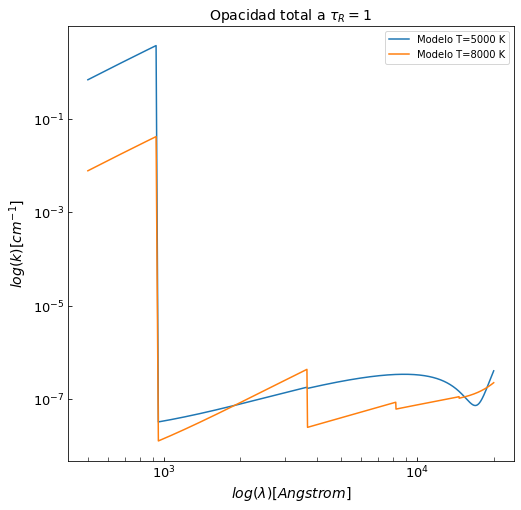

3.7299970442754042


In [ ]:
from matplotlib import legend
##PLOTSSS-------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
#Opacidad total de los procesos del continuo a TauR=1
k_total_5000=np.zeros(len(lamda))
k_total_8000=np.zeros(len(lamda))
for j in range(len(lamda)):
  k_total_5000[j]=(k_ff_5000[40][j]+ k_ff_H_neg_5000[40][j]+ k_bf_HI_1_5000[40][j]+ k_bf_HI_2_5000[40][j] +k_bf_HI_3_5000[40][j]
                  +k_bf_HI_4_5000[40][j] +k_bf_H_neg_5000[40][j]+ ke_5000[40])
  k_total_8000[j]=(k_ff_8000[40][j]+ k_ff_H_neg_8000[40][j]+ k_bf_HI_1_8000[40][j]+ k_bf_HI_2_8000[40][j] +k_bf_HI_3_8000[40][j]
                  +k_bf_HI_4_8000[40][j] +k_bf_H_neg_8000[40][j]+ ke_8000[40])

plt.figure(1,figsize=(8,8))
plt.plot(lamdaA,k_total_5000,label='Modelo T=5000 K')
plt.plot(lamdaA,k_total_8000,label='Modelo T=8000 K')
plt.ylabel('$log(k) [cm^{-1}]$',fontsize=14)
plt.xlabel('$log(\lambda) [Angstrom]$',fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.tick_params(axis ='both', which ='both', length = 4, direction='in',labelsize=13)


plt.legend(loc='best')
plt.title(r'Opacidad total a $\tau_{R}=1$',fontsize=14)
plt.show()

print(k_bf_HI_1_5000[40][22])

In [ ]:
#A continuación, se pide la representación gráfica de la opacidad total, frente a la profundidad óptica, para tres longitudes de onda diferentes:
#En el array de lamda, buscamos las posiciones donde se encuentran apróximadamente las longitudes de onda de interés.
lo1=lamda[159]*10**8 #Posición donde se encuentra apróx. la long. de onda de 3600 A.
lo2=lamda[164]*10**8 #Posición donde se encuentra apróx. la long. de onda de 3700 A.
lo3=lamda[311]*10**8 #Posición donde se encuentra apróx. la long. de onda de 6552 A.
#Hemos localizado los valores más cercanos posibles a estos valores de lamda propuestos en el problema.
#Prints:
print('El valor de lamda 1 es', str(lo1),'Amstrong')
print('El valor de lamda 2 es', str(lo2),'Amstrong')
print('El valor de lamda 3 es', str(lo3), 'Amstrong')


El valor de lamda 1 es 3603.603603603603 Amstrong
El valor de lamda 2 es 3701.201201201201 Amstrong
El valor de lamda 3 es 6570.57057057057 Amstrong


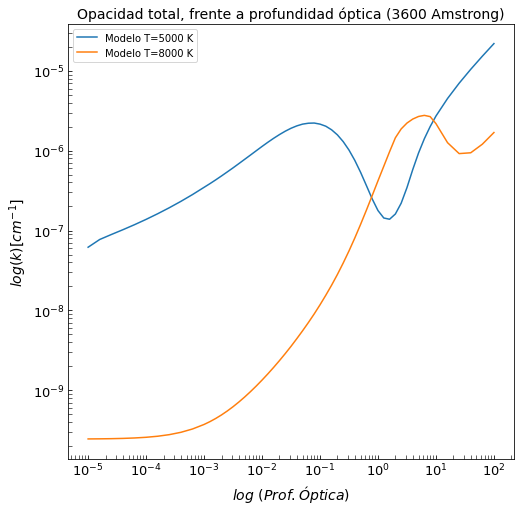

In [ ]:
#Elaboramos el código para graficar la profundidad óptica, frente a la opacidad total,
#Para la longitud de onda 1: 3603.6 A (apróx) se corresponde a 3600 Amstrong.
#########################################################################################
#Opacidad en el rango de la profundidad óptica a 3600 Amstrong
k_total_5000_Tau=np.zeros(len(TauR1)) #Creamos la matriz de opacidad total, con dimensión adecuada, para el modelo 5000 K
k_total_8000_Tau=np.zeros(len(TauR2)) #Creamos la matriz de opacidad total, con dimensión adecuada, para el modelo 8000 K
for j in range(len(TauR1)):
  k_total_5000_Tau[j]=(k_ff_5000[j][159]+ k_ff_H_neg_5000[j][159]+ k_bf_HI_1_5000[j][159]+ k_bf_HI_2_5000[j][159] +k_bf_HI_3_5000[j][159]
                  +k_bf_HI_4_5000[j][159] +k_bf_H_neg_5000[j][159]+ ke_5000[40])
for j in range(len(TauR2)):
  k_total_8000_Tau[j]=(k_ff_8000[j][159]+ k_ff_H_neg_8000[j][159]+ k_bf_HI_1_8000[j][159]+ k_bf_HI_2_8000[j][159] +k_bf_HI_3_8000[j][159]
                  +k_bf_HI_4_8000[j][159] +k_bf_H_neg_8000[j][159]+ ke_8000[40])
#Recorrimos, con un bucle for, para dada la longitud de onda fijada, recorra para las 56 posiciones de prof. óptica.
#Se representa el gráfico, para 3600 A. Los ejes están en escala logarítmica.
plt.figure(2,figsize=(8,8))
plt.plot(TauR1,k_total_5000_Tau,label='Modelo T=5000 K')
plt.plot(TauR2,k_total_8000_Tau,label='Modelo T=8000 K')
plt.ylabel('$log(k) [cm^{-1}]$',fontsize=14)
plt.xlabel('$log$ ($Prof. Óptica$)',fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.tick_params(axis ='both', which ='both', length = 4, direction='in',labelsize=13)


plt.legend(loc='best')
plt.title(r'Opacidad total, frente a profundidad óptica (3600 Amstrong)',fontsize=14)
plt.show()

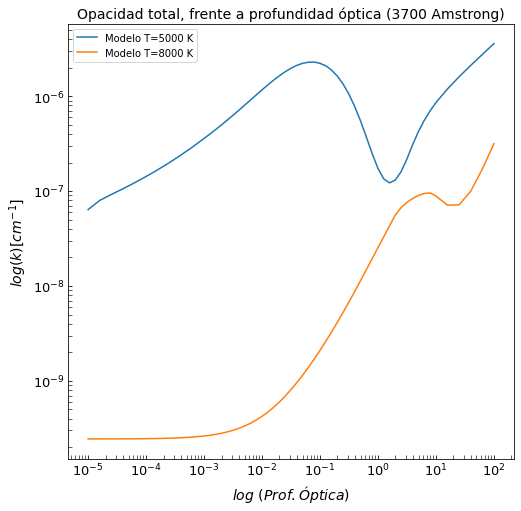

In [ ]:
#Elaboramos el código para graficar la profundidad óptica, frente a la opacidad total,
#Para la longitud de onda 2: 3701.20 A (apróx) se corresponde a 3700 Amstrong.
#########################################################################################
#Opacidad en el rango de la profundidad óptica a 3700 Amstrong
k_total_5000_Tau=np.zeros(len(TauR1)) #Creamos la matriz de opacidad total, con dimensión adecuada, para el modelo 5000 K
k_total_8000_Tau=np.zeros(len(TauR2)) #Creamos la matriz de opacidad total, con dimensión adecuada, para el modelo 8000 K
for j in range(len(TauR1)):
  k_total_5000_Tau[j]=(k_ff_5000[j][164]+ k_ff_H_neg_5000[j][164]+ k_bf_HI_1_5000[j][164]+ k_bf_HI_2_5000[j][164] +k_bf_HI_3_5000[j][164]
                  +k_bf_HI_4_5000[j][164] +k_bf_H_neg_5000[j][164]+ ke_5000[40])
for j in range(len(TauR2)):
  k_total_8000_Tau[j]=(k_ff_8000[j][164]+ k_ff_H_neg_8000[j][164]+ k_bf_HI_1_8000[j][164]+ k_bf_HI_2_8000[j][164] +k_bf_HI_3_8000[j][164]
                  +k_bf_HI_4_8000[j][164] +k_bf_H_neg_8000[j][164]+ ke_8000[40])
#Recorrimos, con un bucle for, para dada la longitud de onda fijada, recorra para las 56 posiciones de prof. óptica.
#Se representa el gráfico, para 3700 A. Los ejes están en escala logarítmica.
plt.figure(2,figsize=(8,8))
plt.plot(TauR1,k_total_5000_Tau,label='Modelo T=5000 K')
plt.plot(TauR2,k_total_8000_Tau,label='Modelo T=8000 K')
plt.ylabel('$log(k) [cm^{-1}]$',fontsize=14)
plt.xlabel('$log$ ($Prof. Óptica$)',fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.tick_params(axis ='both', which ='both', length = 4, direction='in',labelsize=13)


plt.legend(loc='best')
plt.title(r'Opacidad total, frente a profundidad óptica (3700 Amstrong)',fontsize=14)
plt.show()

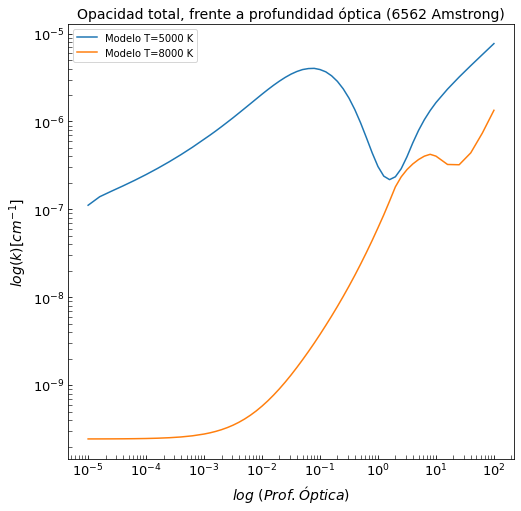

In [ ]:
#Elaboramos el código para graficar la profundidad óptica, frente a la opacidad total,
#Para la longitud de onda 3: 6570.57 A (apróx) se corresponde a 6562 Amstrong.
#########################################################################################
#Opacidad en el rango de la profundidad óptica a 6562 Amstrong
k_total_5000_Tau=np.zeros(len(TauR1)) #Creamos la matriz de opacidad total, con dimensión adecuada, para el modelo 5000 K
k_total_8000_Tau=np.zeros(len(TauR2)) #Creamos la matriz de opacidad total, con dimensión adecuada, para el modelo 8000 K
for j in range(len(TauR1)):
  k_total_5000_Tau[j]=(k_ff_5000[j][311]+ k_ff_H_neg_5000[j][311]+ k_bf_HI_1_5000[j][311]+ k_bf_HI_2_5000[j][311] +k_bf_HI_3_5000[j][311]
                  +k_bf_HI_4_5000[j][311] +k_bf_H_neg_5000[j][311]+ ke_5000[40])
for j in range(len(TauR2)):
  k_total_8000_Tau[j]=(k_ff_8000[j][311]+ k_ff_H_neg_8000[j][311]+ k_bf_HI_1_8000[j][311]+ k_bf_HI_2_8000[j][311] +k_bf_HI_3_8000[j][311]
                  +k_bf_HI_4_8000[j][311] +k_bf_H_neg_8000[j][311]+ ke_8000[40])
#Recorrimos, con un bucle for, para dada la longitud de onda fijada, recorra para las 56 posiciones de prof. óptica.
#Se representa el gráfico, para 6562 A. Los ejes están en escala logarítmica.
plt.figure(2,figsize=(8,8))
plt.plot(TauR1,k_total_5000_Tau,label='Modelo T=5000 K')
plt.plot(TauR2,k_total_8000_Tau,label='Modelo T=8000 K')
plt.ylabel('$log(k) [cm^{-1}]$',fontsize=14)
plt.xlabel('$log$ ($Prof. Óptica$)',fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.tick_params(axis ='both', which ='both', length = 4, direction='in',labelsize=13)


plt.legend(loc='best')
plt.title(r'Opacidad total, frente a profundidad óptica (6562 Amstrong)',fontsize=14)
plt.show()